In [1]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import os

In [2]:
FOLDER_CLASS = '../../../filtered_kanji'
def get_classes_from_folder(folder_path):
    """
    Lấy danh sách class trong folder và gán index theo alphabet
    """
    # Lấy tất cả folder con (mỗi folder = 1 class)
    class_names = [d for d in os.listdir(folder_path) if os.path.isdir(os.path.join(folder_path, d))]
    
    # Sắp xếp alphabet
    class_names.sort()
    
    # Gán index
    class_indices = {name: idx for idx, name in enumerate(class_names)}
    
    return class_indices

class_indices = get_classes_from_folder(FOLDER_CLASS)
print("Số class:", len(class_indices))
print("Class theo thứ tự alphabet:", class_indices)

Số class: 881
Class theo thứ tự alphabet: {'一': 0, '丁': 1, '七': 2, '万': 3, '三': 4, '上': 5, '下': 6, '不': 7, '世': 8, '両': 9, '中': 10, '主': 11, '久': 12, '乗': 13, '九': 14, '予': 15, '争': 16, '事': 17, '二': 18, '五': 19, '交': 20, '京': 21, '人': 22, '仁': 23, '今': 24, '仏': 25, '仕': 26, '他': 27, '付': 28, '代': 29, '令': 30, '以': 31, '仮': 32, '件': 33, '任': 34, '休': 35, '会': 36, '伝': 37, '似': 38, '位': 39, '低': 40, '住': 41, '体': 42, '何': 43, '余': 44, '作': 45, '使': 46, '例': 47, '供': 48, '依': 49, '価': 50, '便': 51, '係': 52, '俗': 53, '保': 54, '信': 55, '修': 56, '俵': 57, '倉': 58, '個': 59, '倍': 60, '候': 61, '借': 62, '停': 63, '健': 64, '側': 65, '備': 66, '働': 67, '像': 68, '億': 69, '元': 70, '兄': 71, '先': 72, '光': 73, '児': 74, '党': 75, '入': 76, '全': 77, '八': 78, '公': 79, '六': 80, '共': 81, '兵': 82, '具': 83, '典': 84, '兼': 85, '内': 86, '円': 87, '再': 88, '写': 89, '冬': 90, '冷': 91, '処': 92, '出': 93, '刀': 94, '分': 95, '切': 96, '刊': 97, '列': 98, '初': 99, '判': 100, '別': 101, '利': 102, '制': 103, '刷': 104, '券': 105, '則': 10

In [ ]:

IMG_SIZE = (128, 127)
COLOR_MODE = 'grayscale'

def preprocess_input_image(image_path):
    """
    Nhận 1 đường dẫn ảnh PNG, trả về numpy array đã:
    - resize về IMG_SIZE
    - grayscale
    - normalize về [0,1]
    - thêm channel dimension để CNN nhận input shape (128,127,1)
    """
    # 1. Load ảnh
    img = Image.open(image_path)
    
    # 2. Chuyển grayscale
    img = img.convert('L')
    
    # 3. Resize về IMG_SIZE (width, height)
    img = img.resize((IMG_SIZE[1], IMG_SIZE[0]))  # (width, height)
    
    # 4. Chuyển về numpy array
    img_array = np.array(img, dtype=np.float32)
    
    # 5. Normalize pixel về [0,1]
    img_array /= 255.0
    
    # 6. Thêm channel dimension
    if COLOR_MODE == 'grayscale':
        img_array = np.expand_dims(img_array, axis=-1)  # shape (128,127,1)
    
    return img_array

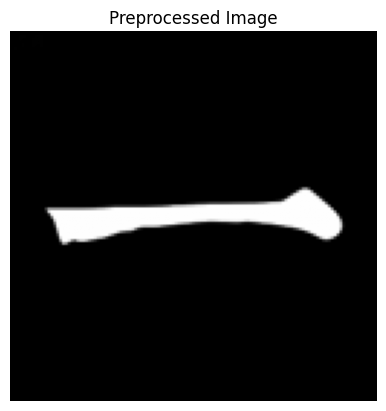

In [43]:
INPUT_PATH = '../../../test_一.png'
image_array = preprocess_input_image(INPUT_PATH)
input_data = np.expand_dims(image_array, axis=0)  # shape (1,128,127,1)

plt.imshow(image_array.squeeze(), cmap='gray')  # _r = reverse
plt.title("Preprocessed Image")
plt.axis('off')
plt.show()


In [38]:
from tensorflow.keras.models import load_model

# Đường dẫn đến file .keras
model_path = "../../../model100_3.keras"

# Load model
model = load_model(model_path)

# Kiểm tra
# model.summary()

In [44]:
# Predict
preds = model.predict(input_data)

# Nếu là phân loại đa lớp
class_idx = np.argmax(preds, axis=1)[0]   # lấy index class dự đoán
confidence = float(np.max(preds))        # độ tin cậy

print("Dự đoán class:", class_idx)
print("Độ tin cậy:", confidence)

# Ánh xạ index -> class name
idx_to_class = {v: k for k, v in class_indices.items()}  # đảo ngược dict

print("Class dự đoán:", idx_to_class[class_idx])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
Dự đoán class: 0
Độ tin cậy: 1.0
Class dự đoán: 一
